In [1]:
#System Modules
import os.path

# Deep Learning Modules
from tensorboardX import SummaryWriter
from torch.autograd import Variable
from torch.utils.data import Dataset, ConcatDataset
from torchvision.utils import make_grid
from torch.nn import *
# User Defined Modules
import specs
from data.Img_dataset import *
from models.UNet import UNet

from serde import *
from utils.augmentation import *
from Training import Training
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
cfg_path = './config.json'
#Uncomment below line if you want to delete an experiment and reuse the same experiment name
delete_experiment('UNet_SGD')
params = create_experiment('UNet_SGD')
cfg_path=params["cfg_path"]

In [5]:
# Train Set

augmentation_operation = Compose([LeftRightFlip(cfg_path), Rotate(cfg_path),
                                  ColRec(cfg_path),GaussianNoise(cfg_path),
                                  ZoomIn(cfg_path),Invert(cfg_path)
                                 ], cfg_path)
train_dataset = ConcatDataset([
        Img_dataset(dataset_name='TrainSet1000',size=1000,cfg_path=cfg_path,augmentation=augmentation_operation),
        Img_dataset(dataset_name='True_Negative_Dataset_Train',size=10,  cfg_path=cfg_path),

    ])


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=1,
                                               shuffle=True, num_workers=4)

# Test Set
test_dataset =  Img_dataset(dataset_name='TestSet20',size=20,cfg_path=cfg_path,mode=Mode.TEST, seed=5)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=1,
                                              shuffle=False, num_workers=4)



TrainSet1000
Images availabe in folder: 	1000
Given Size: 			500 
Images used in dataset:  	500



True_Negative_Dataset_Train
Images availabe in folder: 	258
Given Size: 			10 
Images used in dataset:  	10





In [6]:
#Initialize trainer
#cfg_path=params['cfg_path']
trainer=Training(cfg_path)

In [7]:
#Defime model parameters
optimiser_params={'lr':0.0005}
lane_to_nolane_weight_ratio=10
trainer.setup_model(model=UNet,
                    optimiser=torch.optim.SGD,optimiser_params=optimiser_params,
                    loss_function=CrossEntropyLoss,weight_ratio=lane_to_nolane_weight_ratio)

Starting epoch 1/12.
Epoch [1/12] 

('Current Average Loss: ', tensor(0.5796, device='cuda:0'))
('Current Average Loss: ', tensor(0.5993, device='cuda:0'))
('Current Average Loss: ', tensor(0.5551, device='cuda:0'))
('Current Average Loss: ', tensor(0.5207, device='cuda:0'))
('Current Average Loss: ', tensor(0.5115, device='cuda:0'))
('Current Average Loss: ', tensor(0.5072, device='cuda:0'))


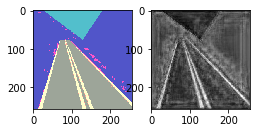

('Current Average Loss: ', tensor(0.4631, device='cuda:0'))
('Current Average Loss: ', tensor(0.4979, device='cuda:0'))
('Current Average Loss: ', tensor(0.4484, device='cuda:0'))
('Current Average Loss: ', tensor(0.5108, device='cuda:0'))
('Current Average Loss: ', tensor(0.5236, device='cuda:0'))


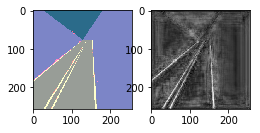

('Current Average Loss: ', tensor(0.5030, device='cuda:0'))
('Current Average Loss: ', tensor(0.5020, device='cuda:0'))
('Current Average Loss: ', tensor(0.5040, device='cuda:0'))
('Current Average Loss: ', tensor(0.4978, device='cuda:0'))
('Current Average Loss: ', tensor(0.4955, device='cuda:0'))


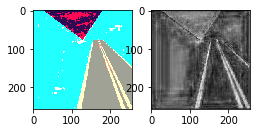

('Current Average Loss: ', tensor(0.4960, device='cuda:0'))
('Current Average Loss: ', tensor(0.4923, device='cuda:0'))
('Current Average Loss: ', tensor(0.4906, device='cuda:0'))
('Current Average Loss: ', tensor(0.4933, device='cuda:0'))
('Current Average Loss: ', tensor(0.4940, device='cuda:0'))


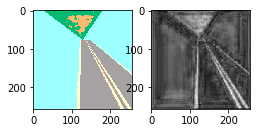

('Current Average Loss: ', tensor(0.4917, device='cuda:0'))
('Current Average Loss: ', tensor(0.4855, device='cuda:0'))
('Current Average Loss: ', tensor(0.4842, device='cuda:0'))
('Current Average Loss: ', tensor(0.4867, device='cuda:0'))
('Current Average Loss: ', tensor(0.4934, device='cuda:0'))
Starting epoch 2/12.
Epoch [2/12] 

('Current Average Loss: ', tensor(0.4650, device='cuda:0'))
('Current Average Loss: ', tensor(0.3773, device='cuda:0'))
('Current Average Loss: ', tensor(0.3345, device='cuda:0'))
('Current Average Loss: ', tensor(0.2929, device='cuda:0'))
('Current Average Loss: ', tensor(0.3077, device='cuda:0'))


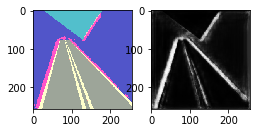

('Current Average Loss: ', tensor(0.1678, device='cuda:0'))
('Current Average Loss: ', tensor(0.1112, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.1637, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       8.1015, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       8.5841, device='cuda:0'))


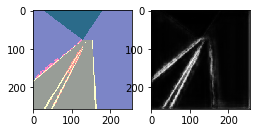

('Current Average Loss: ', tensor(1.00000e-02 *
       8.6232, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       8.2512, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.8725, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.8051, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.5829, device='cuda:0'))


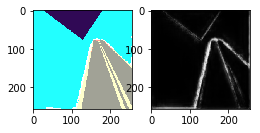

('Current Average Loss: ', tensor(1.00000e-02 *
       7.6040, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.3230, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.4246, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.1020, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.1463, device='cuda:0'))


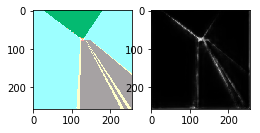

('Current Average Loss: ', tensor(1.00000e-02 *
       8.7600, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       8.5142, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       8.3456, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       8.2388, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.4737, device='cuda:0'))
Starting epoch 3/12.
Epoch [3/12] 

('Current Average Loss: ', tensor(0.2645, device='cuda:0'))
('Current Average Loss: ', tensor(0.2802, device='cuda:0'))
('Current Average Loss: ', tensor(0.2454, device='cuda:0'))
('Current Average Loss: ', tensor(0.1920, device='cuda:0'))
('Current Average Loss: ', tensor(0.2348, device='cuda:0'))


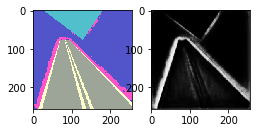

('Current Average Loss: ', tensor(0.1444, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.7734, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       8.1381, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.8497, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.3171, device='cuda:0'))


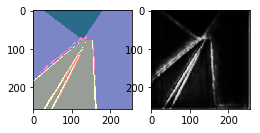

('Current Average Loss: ', tensor(1.00000e-02 *
       7.6821, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.1875, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.8618, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.5535, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.5089, device='cuda:0'))


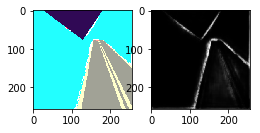

('Current Average Loss: ', tensor(1.00000e-02 *
       6.3490, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.1886, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.0772, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.0614, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.9696, device='cuda:0'))


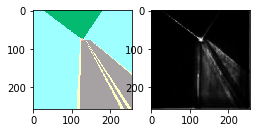

('Current Average Loss: ', tensor(1.00000e-02 *
       6.7845, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.5894, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.5157, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.4770, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.4194, device='cuda:0'))
Starting epoch 4/12.
Epoch [4/12] 

('Current Average Loss: ', tensor(0.1923, device='cuda:0'))
('Current Average Loss: ', tensor(0.1986, device='cuda:0'))
('Current Average Loss: ', tensor(0.1903, device='cuda:0'))
('Current Average Loss: ', tensor(0.1945, device='cuda:0'))
('Current Average Loss: ', tensor(0.1845, device='cuda:0'))


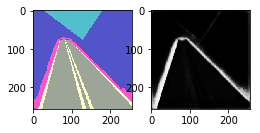

('Current Average Loss: ', tensor(0.1275, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       7.6049, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       5.6900, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.7659, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.9114, device='cuda:0'))


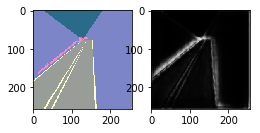

('Current Average Loss: ', tensor(1.00000e-02 *
       5.0173, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.9632, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.6609, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.3874, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.2043, device='cuda:0'))


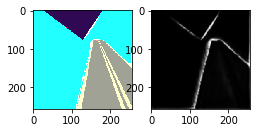

('Current Average Loss: ', tensor(1.00000e-02 *
       4.1693, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.9499, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.8320, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.6723, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.7069, device='cuda:0'))


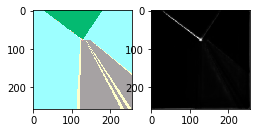

('Current Average Loss: ', tensor(1.00000e-02 *
       4.4945, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.3195, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.1966, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.0895, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       5.1380, device='cuda:0'))
Starting epoch 5/12.
Epoch [5/12] 

('Current Average Loss: ', tensor(0.1628, device='cuda:0'))
('Current Average Loss: ', tensor(0.2042, device='cuda:0'))
('Current Average Loss: ', tensor(0.1904, device='cuda:0'))
('Current Average Loss: ', tensor(0.1387, device='cuda:0'))
('Current Average Loss: ', tensor(0.1600, device='cuda:0'))


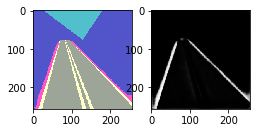

('Current Average Loss: ', tensor(1.00000e-02 *
       7.0738, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9404, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.0108, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.3954, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.5932, device='cuda:0'))


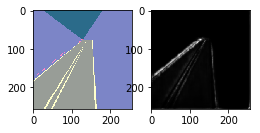

('Current Average Loss: ', tensor(1.00000e-02 *
       2.5297, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.4823, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2695, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.1393, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.0263, device='cuda:0'))


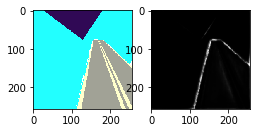

('Current Average Loss: ', tensor(1.00000e-02 *
       2.0024, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.4221, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.3370, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2129, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2733, device='cuda:0'))


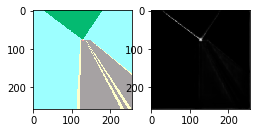

('Current Average Loss: ', tensor(1.00000e-02 *
       2.1845, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.1141, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.0683, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.9967, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.6195, device='cuda:0'))
Starting epoch 6/12.
Epoch [6/12] 

('Current Average Loss: ', tensor(0.1814, device='cuda:0'))
('Current Average Loss: ', tensor(0.1726, device='cuda:0'))
('Current Average Loss: ', tensor(0.1626, device='cuda:0'))
('Current Average Loss: ', tensor(0.1395, device='cuda:0'))
('Current Average Loss: ', tensor(0.1307, device='cuda:0'))


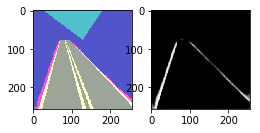

('Current Average Loss: ', tensor(1.00000e-02 *
       4.6798, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.6311, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.8891, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.5350, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.7760, device='cuda:0'))


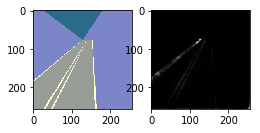

('Current Average Loss: ', tensor(1.00000e-02 *
       1.5783, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.4233, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.3116, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.2389, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.1634, device='cuda:0'))


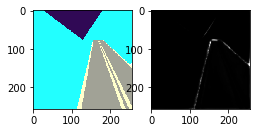

('Current Average Loss: ', tensor(1.00000e-02 *
       1.1141, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.3930, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.3461, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.2732, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.2954, device='cuda:0'))


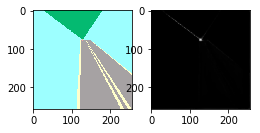

('Current Average Loss: ', tensor(1.00000e-02 *
       1.2388, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.1846, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.1680, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.1335, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.5715, device='cuda:0'))
Starting epoch 7/12.
Epoch [7/12] 

('Current Average Loss: ', tensor(0.1240, device='cuda:0'))
('Current Average Loss: ', tensor(0.1228, device='cuda:0'))
('Current Average Loss: ', tensor(0.1274, device='cuda:0'))
('Current Average Loss: ', tensor(0.1220, device='cuda:0'))
('Current Average Loss: ', tensor(0.1847, device='cuda:0'))


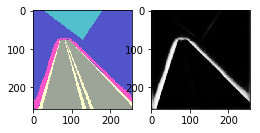

('Current Average Loss: ', tensor(0.1316, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.7636, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       5.3312, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.1309, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.7361, device='cuda:0'))


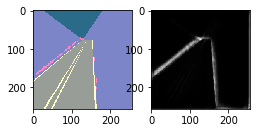

('Current Average Loss: ', tensor(1.00000e-02 *
       3.7250, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.3494, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.9706, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.7127, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.4910, device='cuda:0'))


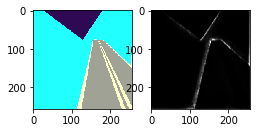

('Current Average Loss: ', tensor(1.00000e-02 *
       2.4298, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.2385, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.0821, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.9056, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.8892, device='cuda:0'))


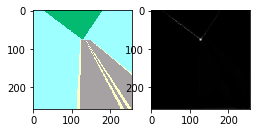

('Current Average Loss: ', tensor(1.00000e-02 *
       2.7339, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.6004, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.4901, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.3760, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.2432, device='cuda:0'))
Starting epoch 8/12.
Epoch [8/12] 

('Current Average Loss: ', tensor(0.1429, device='cuda:0'))
('Current Average Loss: ', tensor(0.1322, device='cuda:0'))
('Current Average Loss: ', tensor(0.1337, device='cuda:0'))
('Current Average Loss: ', tensor(0.1234, device='cuda:0'))
('Current Average Loss: ', tensor(0.1250, device='cuda:0'))


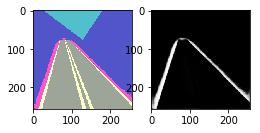

('Current Average Loss: ', tensor(0.1089, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       5.6393, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9943, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.1367, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.9056, device='cuda:0'))


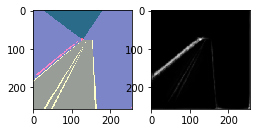

('Current Average Loss: ', tensor(1.00000e-02 *
       2.7523, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.5019, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2300, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.0271, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.8708, device='cuda:0'))


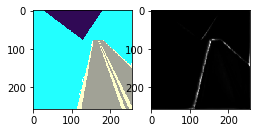

('Current Average Loss: ', tensor(1.00000e-02 *
       1.7934, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.5386, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.4010, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2486, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2464, device='cuda:0'))


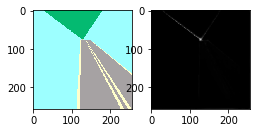

('Current Average Loss: ', tensor(1.00000e-02 *
       2.1306, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.0278, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.9596, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.8739, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.6415, device='cuda:0'))
Starting epoch 9/12.
Epoch [9/12] 

('Current Average Loss: ', tensor(0.1437, device='cuda:0'))
('Current Average Loss: ', tensor(0.1581, device='cuda:0'))
('Current Average Loss: ', tensor(0.1528, device='cuda:0'))
('Current Average Loss: ', tensor(0.1213, device='cuda:0'))
('Current Average Loss: ', tensor(0.1005, device='cuda:0'))


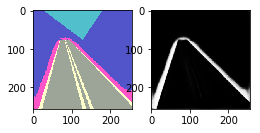

('Current Average Loss: ', tensor(0.1732, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       9.0296, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.2748, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       5.0624, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.4117, device='cuda:0'))


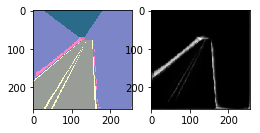

('Current Average Loss: ', tensor(1.00000e-02 *
       4.3259, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9990, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.5713, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.2593, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.0275, device='cuda:0'))


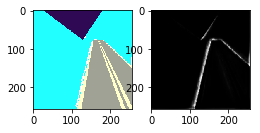

('Current Average Loss: ', tensor(1.00000e-02 *
       2.9704, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.6444, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.4832, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.2704, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.2900, device='cuda:0'))


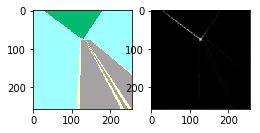

('Current Average Loss: ', tensor(1.00000e-02 *
       3.1274, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.9782, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.8687, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.7523, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.6500, device='cuda:0'))
Starting epoch 10/12.
Epoch [10/12] 

('Current Average Loss: ', tensor(0.1131, device='cuda:0'))
('Current Average Loss: ', tensor(0.1249, device='cuda:0'))
('Current Average Loss: ', tensor(0.1417, device='cuda:0'))
('Current Average Loss: ', tensor(0.1212, device='cuda:0'))
('Current Average Loss: ', tensor(0.1109, device='cuda:0'))


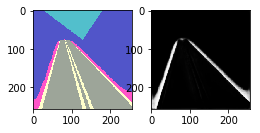

('Current Average Loss: ', tensor(0.1050, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       5.6233, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9743, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.1448, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.9511, device='cuda:0'))


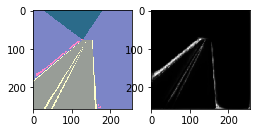

('Current Average Loss: ', tensor(1.00000e-02 *
       2.8645, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.6561, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.3986, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2229, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.1155, device='cuda:0'))


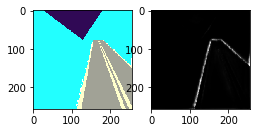

('Current Average Loss: ', tensor(1.00000e-02 *
       2.0508, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.3764, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.3153, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.1813, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.1677, device='cuda:0'))


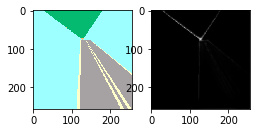

('Current Average Loss: ', tensor(1.00000e-02 *
       2.0757, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.9908, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.9460, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       1.8850, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.4366, device='cuda:0'))
Starting epoch 11/12.
Epoch [11/12] 

('Current Average Loss: ', tensor(1.00000e-02 *
       4.7120, device='cuda:0'))
('Current Average Loss: ', tensor(0.1182, device='cuda:0'))
('Current Average Loss: ', tensor(0.1095, device='cuda:0'))
('Current Average Loss: ', tensor(0.1206, device='cuda:0'))
('Current Average Loss: ', tensor(0.1501, device='cuda:0'))
('Current Average Loss: ', tensor(0.1343, device='cuda:0'))


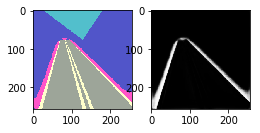

('Current Average Loss: ', tensor(0.1221, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.4245, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.8379, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.8485, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.5068, device='cuda:0'))


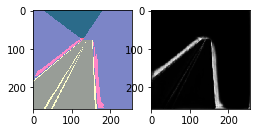

('Current Average Loss: ', tensor(1.00000e-02 *
       3.8714, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.5721, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.2033, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.9229, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.7323, device='cuda:0'))


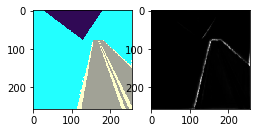

('Current Average Loss: ', tensor(1.00000e-02 *
       2.5778, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.8391, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.7034, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.5673, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.5018, device='cuda:0'))


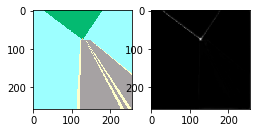

('Current Average Loss: ', tensor(1.00000e-02 *
       2.3737, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2695, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.2041, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.1201, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       2.5616, device='cuda:0'))
Starting epoch 12/12.
Epoch [12/12] 

('Current Average Loss: ', tensor(0.1142, device='cuda:0'))
('Current Average Loss: ', tensor(0.1157, device='cuda:0'))
('Current Average Loss: ', tensor(0.1055, device='cuda:0'))
('Current Average Loss: ', tensor(0.1182, device='cuda:0'))
('Current Average Loss: ', tensor(0.1515, device='cuda:0'))


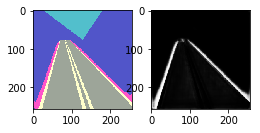

('Current Average Loss: ', tensor(0.1060, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       6.6901, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       5.3227, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.3813, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.1030, device='cuda:0'))


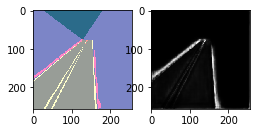

('Current Average Loss: ', tensor(1.00000e-02 *
       4.2905, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9629, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.7231, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.5910, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.5227, device='cuda:0'))


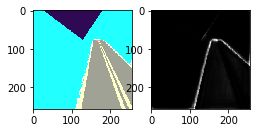

('Current Average Loss: ', tensor(1.00000e-02 *
       3.4567, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       4.0562, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9594, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.8954, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9008, device='cuda:0'))


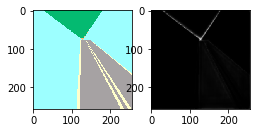

('Current Average Loss: ', tensor(1.00000e-02 *
       3.7408, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.6144, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.5034, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.4404, device='cuda:0'))
('Current Average Loss: ', tensor(1.00000e-02 *
       3.9033, device='cuda:0'))


NameError: global name 'datetime' is not defined

In [8]:
#Execute Training
trainer.execute_training(train_loader,test_loader,num_epochs=12)